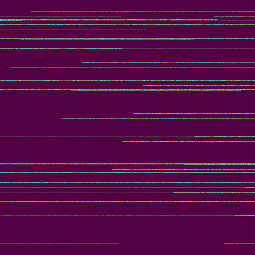

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
gen_seq = Image.open("gen_seq_resized.png")
gen_seq

In [2]:
gen_seq = gen_seq.resize((255, 255))
plt.imsave('gen_seq_resized.png', gen_seq)

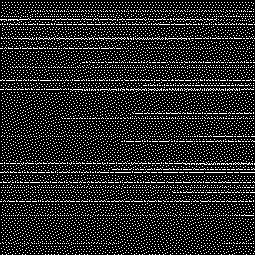

In [3]:
img_bin = gen_seq.convert("1")
img_bin

In [4]:
filter_size = 5
overlap_n = 4

learning_rate = 0.01

In [5]:
from pydbm.dbm.deepboltzmannmachine.shape_boltzmann_machine import ShapeBoltzmannMachine

In [6]:
from pydbm.dbm.builders.dbm_multi_layer_builder import DBMMultiLayerBuilder

In [7]:
import numpy as np
dbm = ShapeBoltzmannMachine(
    DBMMultiLayerBuilder(),
    learning_rate=learning_rate,
    overlap_n=overlap_n,
    filter_size=filter_size
)

img_arr = np.asarray(img_bin)
img_arr = img_arr.astype(np.float64)


dbm.learn(
    img_arr,
    training_count=5,# k
    batch_size=300,
    r_batch_size=-1,
    sgd_flag=True # using stochastic gradient descent
)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `inferencing_plan` will be removed in future version.
  


In [8]:
inferenced_data_arr = dbm.visible_points_arr.copy()
# inferenced_data_arr = 255 - inferenced_data_arr
gen = Image.fromarray(np.uint8(inferenced_data_arr)).convert('RGB')

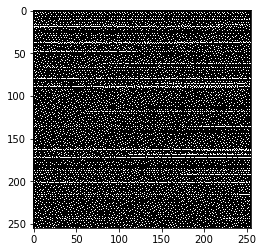

In [9]:
plt.imshow(gen, interpolation='nearest')
plt.show()

In [10]:
plt.imsave('generated_gen_seq.png', gen)

In [11]:
npImage = np.array(Image.open("gen_seq_resized.png").convert('RGB'))
npImage

array([[[84,  1, 68],
        [84,  1, 68],
        [84,  1, 68],
        ...,
        [84,  1, 68],
        [84,  1, 68],
        [84,  1, 68]],

       [[84,  1, 68],
        [84,  1, 68],
        [84,  1, 68],
        ...,
        [84,  1, 68],
        [84,  1, 68],
        [84,  1, 68]],

       [[84,  1, 68],
        [84,  1, 68],
        [84,  1, 68],
        ...,
        [84,  1, 68],
        [84,  1, 68],
        [84,  1, 68]],

       ...,

       [[84,  1, 68],
        [84,  1, 68],
        [84,  1, 68],
        ...,
        [84,  1, 68],
        [84,  1, 68],
        [84,  1, 68]],

       [[84,  1, 68],
        [84,  1, 68],
        [84,  1, 68],
        ...,
        [84,  1, 68],
        [84,  1, 68],
        [84,  1, 68]],

       [[84,  1, 68],
        [84,  1, 68],
        [84,  1, 68],
        ...,
        [84,  1, 68],
        [84,  1, 68],
        [84,  1, 68]]], dtype=uint8)

In [12]:
npMask=np.array(Image.open("generated_gen_seq.png").convert("RGB"))
npMask

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [13]:
cond = npMask<255

In [14]:
pixels=np.where(cond, npImage, npMask)

In [15]:
result=Image.fromarray(pixels)

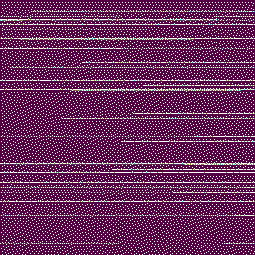

In [16]:
result

In [17]:
pixels

array([[[ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68],
        ...,
        [ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68]],

       [[ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68],
        ...,
        [ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68]],

       [[ 84,   1,  68],
        [ 84,   1,  68],
        [255, 255, 255],
        ...,
        [ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68]],

       ...,

       [[ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68],
        ...,
        [ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68]],

       [[ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68],
        ...,
        [ 84,   1,  68],
        [255, 255, 255],
        [ 84,   1,  68]],

       [[ 84,   1,  68],
        [ 84,   1,  68],
        [255, 255, 255],
        ...,
        [ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68]]

In [32]:
cond2 = result==1

In [33]:
cond2

False

In [34]:
cond2[cond2 == True]

TypeError: 'bool' object is not subscriptable

In [35]:
pixels2 = np.where(cond2, npImage, result)

In [36]:
result2 = Image.fromarray(pixels2)

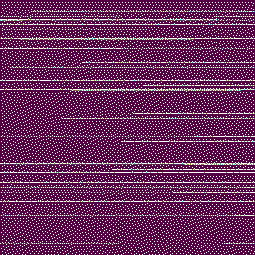

In [37]:
result2

In [24]:
plt.imsave('generated_gen_seq_rgb.png', pixels2)

In [25]:
generated_gen_seq_rgb = Image.open('generated_gen_seq_rgb.png')

In [27]:
generated_gen_seq_rgb = generated_gen_seq_rgb.resize((200, 200))

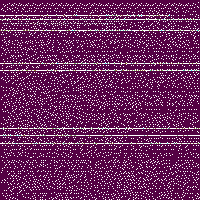

In [28]:
generated_gen_seq_rgb